<a href="https://colab.research.google.com/github/aaryanrajput26/Deep-Learning/blob/main/DL_exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def load_mnist_images(filepath):
    with open(filepath, 'rb') as f:
        data = np.frombuffer(f.read(), dtype=np.uint8, offset=16)
    data = data.reshape(-1, 28 * 28)
    data = data.astype(np.float32) / 255.0
    return data

def load_mnist_labels(filepath):
    with open(filepath, 'rb') as f:
        labels = np.frombuffer(f.read(), dtype=np.uint8, offset=8)
    return labels


In [5]:
train_images = load_mnist_images('train-images.idx3-ubyte')
train_labels = load_mnist_labels('train-labels.idx1-ubyte')

test_images = load_mnist_images('t10k-images.idx3-ubyte')
test_labels = load_mnist_labels('t10k-labels.idx1-ubyte')

print("Training set:", train_images.shape)
print("Test set:", test_images.shape)


Training set: (60000, 784)
Test set: (10000, 784)


In [6]:
def one_hot(labels, num_classes=10):
    encoded = np.zeros((labels.size, num_classes))
    encoded[np.arange(labels.size), labels] = 1
    return encoded

train_labels_oh = one_hot(train_labels)
test_labels_oh = one_hot(test_labels)


In [7]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


In [8]:
np.random.seed(42)

input_size = 784
hidden_size = 128
output_size = 10

W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))


In [9]:
learning_rate = 0.1
epochs = 20
batch_size = 64

for epoch in range(epochs):
    permutation = np.random.permutation(train_images.shape[0])
    train_images_shuffled = train_images[permutation]
    train_labels_shuffled = train_labels_oh[permutation]

    for i in range(0, train_images.shape[0], batch_size):
        X_batch = train_images_shuffled[i:i+batch_size]
        y_batch = train_labels_shuffled[i:i+batch_size]

        # Forward pass
        z1 = np.dot(X_batch, W1) + b1
        a1 = relu(z1)

        z2 = np.dot(a1, W2) + b2
        y_pred = softmax(z2)

        # Backpropagation
        error = y_pred - y_batch

        dW2 = np.dot(a1.T, error) / batch_size
        db2 = np.sum(error, axis=0, keepdims=True) / batch_size

        da1 = np.dot(error, W2.T)
        dz1 = da1 * relu_derivative(z1)

        dW1 = np.dot(X_batch.T, dz1) / batch_size
        db1 = np.sum(dz1, axis=0, keepdims=True) / batch_size

        # Update parameters
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

    # Accuracy after each epoch
    z1_test = np.dot(test_images, W1) + b1
    a1_test = relu(z1_test)
    z2_test = np.dot(a1_test, W2) + b2
    predictions = np.argmax(softmax(z2_test), axis=1)

    accuracy = np.mean(predictions == test_labels)
    print(f"Epoch {epoch+1}/{epochs}, Test Accuracy: {accuracy:.4f}")


Epoch 1/20, Test Accuracy: 0.9179
Epoch 2/20, Test Accuracy: 0.9418
Epoch 3/20, Test Accuracy: 0.9531
Epoch 4/20, Test Accuracy: 0.9602
Epoch 5/20, Test Accuracy: 0.9644
Epoch 6/20, Test Accuracy: 0.9674
Epoch 7/20, Test Accuracy: 0.9698
Epoch 8/20, Test Accuracy: 0.9743
Epoch 9/20, Test Accuracy: 0.9722
Epoch 10/20, Test Accuracy: 0.9758
Epoch 11/20, Test Accuracy: 0.9754
Epoch 12/20, Test Accuracy: 0.9788
Epoch 13/20, Test Accuracy: 0.9785
Epoch 14/20, Test Accuracy: 0.9793
Epoch 15/20, Test Accuracy: 0.9793
Epoch 16/20, Test Accuracy: 0.9775
Epoch 17/20, Test Accuracy: 0.9798
Epoch 18/20, Test Accuracy: 0.9784
Epoch 19/20, Test Accuracy: 0.9770
Epoch 20/20, Test Accuracy: 0.9777


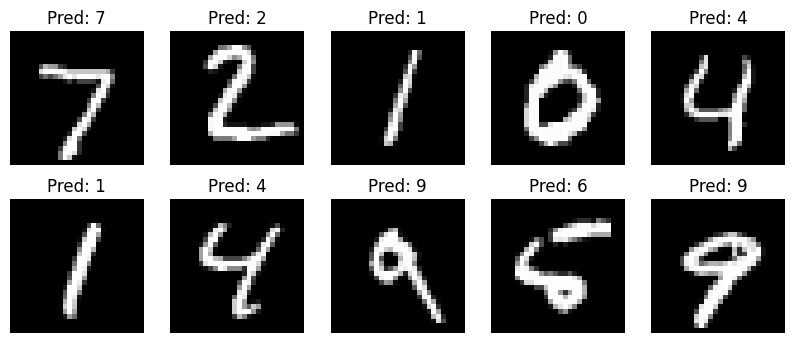

In [10]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(test_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {predictions[i]}")
    plt.axis('off')
plt.show()
